###**BACKGROUND**

FundFusion, sebuah institusi bank di Wakanda, ingin mengembangkan upaya pelayanan marketingnya terhadap nasabah existing maupun nasabah baru. Salah satu strategi marketing-nya adalah melakukan kampanye berbasis telepon atau telemarketing. Cara kerja strategi tersebut adalah menggunakan media telepon untuk menawarkan produk kepada nasabah.

Saat ini, FundFusion belum memiliki strategi yang jelas dalam hal penawaran produk ketika menghubungi calon nasabah. Masing-masing account manager memiliki KPI yang berbeda untuk customer acquisition berdasarkan produk yang ditawarkan oleh FundFusion, seperti Tabungan, Deposito, Kartu Kredit, Kredit Rumah, Kredit Kendaraan, maupun Kredit Dana Tunai. Hal ini mengakibatkan calon nasabah sehari dapat dihubungi berulang kali oleh account manager yang berbeda untuk ditawarkan produk yang berbeda pula. Implikasinya, rejection rate yang didapatkan sangat tinggi dan dianggap sebagai spam oleh calon nasabah yang berujung pada pemblokiran nomor.


### **PROBLEM STATEMENT**

Belum memiliki strategi yang tepat untuk menawarkan jenis produk yang sesuai dengan segmen calon nasabah yang akan direkrut

### **OBJECTIVE**

Membuat Sebuah Model Clustering untuk mengetahui kepemilikan produk berdasarkan demografi nasabah yang saat ini sudah menggunakan layanan FundFusion dengan Silhouette Score >0.7


### **VARIABEL YANG TERSEDIA**

Dari dataset yang dimiliki terdapat beberapa data yang tersedia:


---
**1. GCIF                     :** Unique Identifier Nasabah\
**2. Area                     :** Lokasi Nasabah (Jakarta,Bogor,Bandung,Surabaya,Jogja,Solo)\
**3. Jalur_Pembukaan          :** Touch Points Nasabah membuka produk --> Cabang, Telemarketing, Aplikasi Digital, Internet Banking\
**4. Vintage                  :** Durasi Menjadi Nasabah (Sejak membuka akun)\
**5. Usia                     :** Usia Nasabah\
**6. Jenis_Kelamin            :** Laki-laki (1) & Perempuan (0)\
**7. Status_Perkawinan        :** Belum Menikah (0), Menikah (1), Cerai (2), Janda/Duda (3)\
**8. Jumlah_Anak              :** Jumlah Anak Nasabah (numerik)\
**9. Pendidikan               :** Status Pendidikan Terakhir --> Tidak Memiliki Pendidikan Formal (0), SD (1), SMP (2), SMA (3), Sarjana (4), Magister (5), Doktor (6)\
**10. Produk_Tabungan         :** Status Kepemilikan Produk (Yes/1, No/0)\
**11. Produk_Deposito         :** Status Kepemilikan Produk (Yes/1, No/0)\
**12. Produk_Kartu_Kredit     :** Status Kepemilikan Produk (Yes/1, No/0)\
**13. Produk_Kredit_Rumah     :** Status Kepemilikan Produk (Yes/1, No/0)\
**14. Produk_Kredit_Kendaraan :** Status Kepemilikan Produk (Yes/1, No/0)\
**15. Produk_Kredit_Dana_Tunai:** Status Kepemilikan Produk (Yes/1, No/0)\
**16. Total_Kepemilikan_Produk:** Jumlah Produk Yang Dimiliki (Penjumlahan dari Produk2)\
**17. Pendapatan_Tahunan      :** Rata-rata Pendapatan Dalam Setahun\
**18. Total_Relationship_Balance :** Total Asset Nasabah dalam Cutoff Bulan Observasi





### **EXPERIMENT**

Point of View:
1. Dikelompokkan berdasarkan demografis untuk dicari pattern kepemilikan produk
2. Dikelompookan berdasarkan kepemilikan produk untuk dicari patter berdasarkan demografisnya

### **IMPORT PACKAGE**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
pd.set_option('display.max_columns', None)

### **DATA FOR CLUSTERING**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [129]:
path_1 = f"https://drive.google.com/uc?export=download&id=1VJnuJXDGZMM00W9Szr9biwLEPDNQLD0b"
data = pd.read_csv(path_1)
data.head()

,GCIF,Area,Jalur_Pembukaan,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,G28036,Bogor,Internet Banking,< 1 Tahun,69.0,Laki-laki,Menikah,3,Doktor,1,0,0,0,0,0,1,747,44607
1,G18528,Jakarta,Telemarketing,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
2,G22419,Surabaya,Telemarketing,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
3,G04482,Bandung,Cabang,< 1 Tahun,45.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,431,417250579
4,G07807,Bandung,Aplikasi Digital,< 1 Tahun,34.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,184,453573593


In [130]:
# Struktur Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28129 entries, 0 to 28128
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GCIF                        28129 non-null  object 
 1   Area                        28129 non-null  object 
 2   Jalur_Pembukaan             28129 non-null  object 
 3   Vintage                     28129 non-null  object 
 4   Usia                        24084 non-null  float64
 5   Jenis_Kelamin               28129 non-null  object 
 6   Status_Perkawinan           28129 non-null  object 
 7   Jumlah_Anak                 28129 non-null  int64  
 8   Pendidikan                  28129 non-null  object 
 9   Produk_Tabungan             28129 non-null  int64  
 10  Produk_Deposito             28129 non-null  int64  
 11  Produk_Kartu_Kredit         28129 non-null  int64  
 12  Produk_Kredit_Rumah         28129 non-null  int64  
 13  Produk_Kredit_Kendaraan     281

In [131]:
# Statistika Deskriptif
data.describe().round()

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
count,24084.0,28129.0,28129.0,28129.0,28129.0,28129.0,28129.0,28129.0,28129.0,28129.0,28129.0
mean,43.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,3.0,406.0,249044419.0
std,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,180.0,158226160.0
min,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,80.0,1028.0
25%,31.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,282.0,121096546.0
50%,43.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,3.0,392.0,241109369.0
75%,52.0,3.0,1.0,1.0,1.0,1.0,0.0,1.0,4.0,498.0,359203485.0
max,70.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,900.0,897931542.0


### **DATA UNDERSTANDING**

**Analisis Berdasarkan Lokasi**
- Jumlah Nasabah Berdasarkan Lokasi
- Rata-Rata Variabel Berdasarkan Lokasi

In [132]:
 data.groupby('Area')['Area'].count().rename('Jumlah Nasabah').sort_values(ascending=False)

,Jumlah Nasabah
Area,
Jakarta,7017
Bandung,6917
Surabaya,5002
Solo,5001
Jogja,3001
Bogor,1191


In [133]:
data.groupby('Area').mean(numeric_only=True)

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Area,,,,,,,,,,,
Bandung,42.562310,1.296516,0.925401,0.599682,0.329767,0.587393,0.163076,0.537516,3.142836,405.124910,2.454722e+08
Bogor,42.660451,1.366919,0.921075,0.596977,0.324097,0.582704,0.160369,0.554996,3.140218,402.227540,2.499853e+08
Jakarta,42.696995,1.322930,0.925467,0.603534,0.336184,0.590708,0.169873,0.540829,3.166595,406.478552,2.485876e+08
Jogja,42.512422,1.309897,0.934355,0.608464,0.333555,0.594469,0.158614,0.535155,3.164612,402.694768,2.496616e+08
Solo,42.445452,1.270746,0.922416,0.603479,0.337932,0.604679,0.156969,0.540492,3.165967,408.010198,2.507478e+08
Surabaya,42.768980,1.284486,0.927629,0.608357,0.329668,0.585566,0.168533,0.528589,3.148341,409.074370,2.523277e+08


**Analisis Berdasarkan Lama Keanggotaan**
- Jumlah Nasabah Berdasarkan Lama Keanggotaan
- Rata-Rata Variabel Berdasarkan Lama Keanggotaan

In [134]:
data.groupby('Vintage')['Vintage'].count().rename('Jumlah Nasabah').sort_values(ascending=False)

,Jumlah Nasabah
Vintage,
2 - 3 Tahun,13953
< 1 Tahun,9278
> 4 Tahun,4898


In [135]:
data.groupby('Vintage').mean(numeric_only=True)

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Vintage,,,,,,,,,,,
2 - 3 Tahun,42.578850,1.291694,0.927256,0.607755,0.328531,0.589336,0.163764,0.539311,3.155952,407.679639,2.489367e+08
< 1 Tahun,42.689341,1.294676,0.931235,0.592585,0.336495,0.594201,0.164798,0.523389,3.142703,395.611231,2.486679e+08
> 4 Tahun,42.571866,1.338301,0.912822,0.613107,0.338914,0.592691,0.163536,0.560637,3.181707,422.593508,2.500646e+08


**Analisis Berdasarkan Jalur Pembukaan**
- Jumlah Nasabah Berdasarkan Jalur Pembukaan
- Rata-Rata Variabel Berdasarkan Jalur Pembukaan

In [136]:
data.groupby('Jalur_Pembukaan')['Jalur_Pembukaan'].count().rename('Jumlah Nasabah').sort_values(ascending=False)

,Jumlah Nasabah
Jalur_Pembukaan,
Telemarketing,10262
Aplikasi Digital,6216
Cabang,5856
Internet Banking,5795


In [137]:
data.groupby('Jalur_Pembukaan').mean(numeric_only=True)

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Jalur_Pembukaan,,,,,,,,,,,
Aplikasi Digital,42.442089,1.292149,0.930180,0.598456,0.323681,0.593147,0.165541,0.535714,3.146718,405.278314,2.489950e+08
Cabang,42.560627,1.308743,0.924180,0.610143,0.325478,0.583675,0.153518,0.544740,3.141735,409.923156,2.456661e+08
Internet Banking,42.723992,1.302502,0.928387,0.597929,0.347368,0.598965,0.169802,0.531493,3.173943,406.593270,2.517532e+08
Telemarketing,42.676514,1.300526,0.923309,0.606412,0.334730,0.590821,0.165952,0.538589,3.159813,404.674527,2.494725e+08


**Analisis Berdasarkan Status Perkawinan**
- Jumlah Nasabah Berdasarkan Status Perkawinan
- Rata-Rata Variabel Berdasarkan Status Perkawinan

In [138]:
data.groupby('Status_Perkawinan')['Status_Perkawinan'].count().rename('Jumlah Nasabah').sort_values(ascending=False)

,Jumlah Nasabah
Status_Perkawinan,
Menikah,11839
Belum Menikah,8168
Cerai,4077
Janda/Duda,4045


In [139]:
data.groupby('Status_Perkawinan').mean(numeric_only=True)

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Status_Perkawinan,,,,,,,,,,,
Belum Menikah,39.571621,0.000000,1.000000,0.596107,0.333374,0.331660,0.160749,0.499633,2.921523,420.636141,2.423448e+08
Cerai,50.226883,2.003679,1.000000,0.607555,0.337258,0.509688,0.172676,0.389747,3.016924,426.269070,2.393499e+08
Janda/Duda,NaN,1.201978,1.000000,0.609889,0.337948,0.597281,0.161187,0.401731,3.108035,289.648208,2.474754e+08
Menikah,42.084467,1.989948,0.824309,0.605457,0.329504,0.797027,0.164372,0.661542,3.382211,429.378833,2.575412e+08


**Sebaran Nasabah Berdasarkan Tingkat Pendidikan**

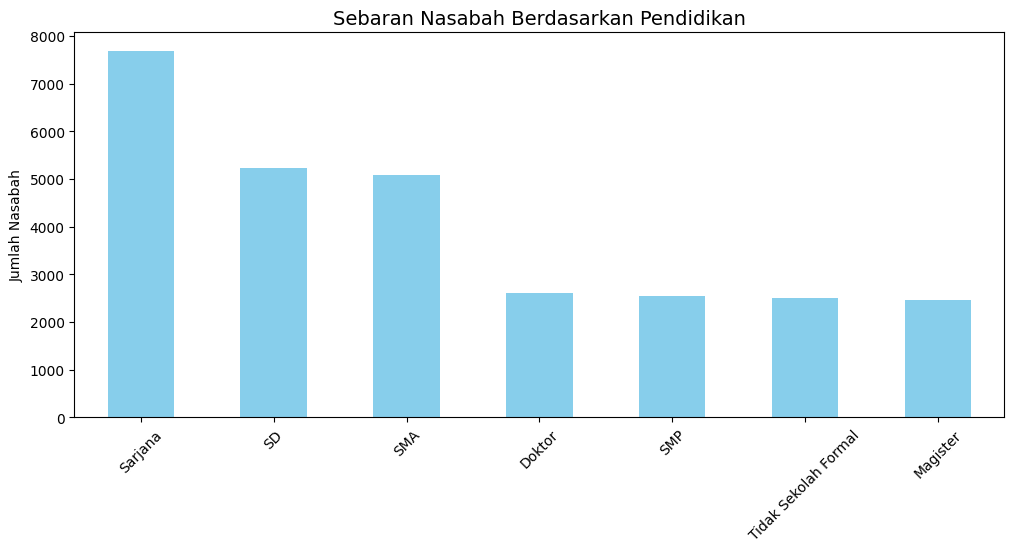

In [140]:
plt.figure(figsize=(12,5))
data['Pendidikan'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Sebaran Nasabah Berdasarkan Pendidikan", fontsize=14)
plt.xlabel("")
plt.ylabel("Jumlah Nasabah")
plt.tick_params(axis='x', rotation=45)
plt.show()

**Sebaran Nasabah Berdasarkan Usia**

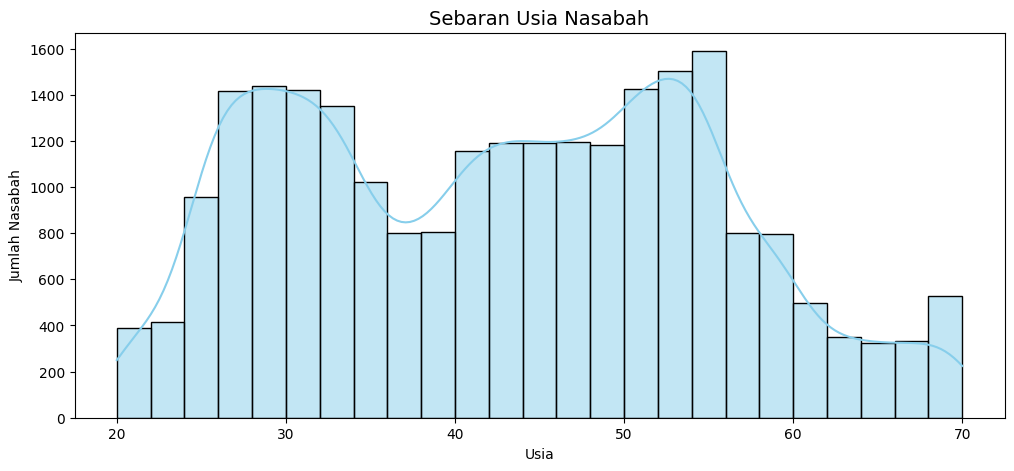

In [141]:
plt.figure(figsize=(12,5))
sns.histplot(data['Usia'], bins=25, kde=True, color='skyblue')
plt.title("Sebaran Usia Nasabah", fontsize=14)
plt.xlabel("Usia")
plt.ylabel("Jumlah Nasabah")
plt.show()

### **DATA PREPARATION**

#### **Pengecekan Data Duplikat dan Missing Data**

In [142]:
# Cek Missing Value
print(data.isnull().sum())

GCIF                             0
Area                             0
Jalur_Pembukaan                  0
Vintage                          0
Usia                          4045
Jenis_Kelamin                    0
Status_Perkawinan                0
Jumlah_Anak                      0
Pendidikan                       0
Produk_Tabungan                  0
Produk_Deposito                  0
Produk_Kartu_Kredit              0
Produk_Kredit_Rumah              0
Produk_Kredit_Kendaraan          0
Produk_Kredit_Dana_Tunai         0
Total_Kepemilikan_Produk         0
Pendapatan_Tahunan               0
Total_Relationship_Balance       0
dtype: int64


In [143]:
# Hapus missing value
data = data.dropna()

print(data.isnull().sum())

GCIF                          0
Area                          0
Jalur_Pembukaan               0
Vintage                       0
Usia                          0
Jenis_Kelamin                 0
Status_Perkawinan             0
Jumlah_Anak                   0
Pendidikan                    0
Produk_Tabungan               0
Produk_Deposito               0
Produk_Kartu_Kredit           0
Produk_Kredit_Rumah           0
Produk_Kredit_Kendaraan       0
Produk_Kredit_Dana_Tunai      0
Total_Kepemilikan_Produk      0
Pendapatan_Tahunan            0
Total_Relationship_Balance    0
dtype: int64


In [144]:
# Cek Data Duplicate
data.duplicated().sum()

np.int64(0)

#### **Pengecekan Data Outlier**

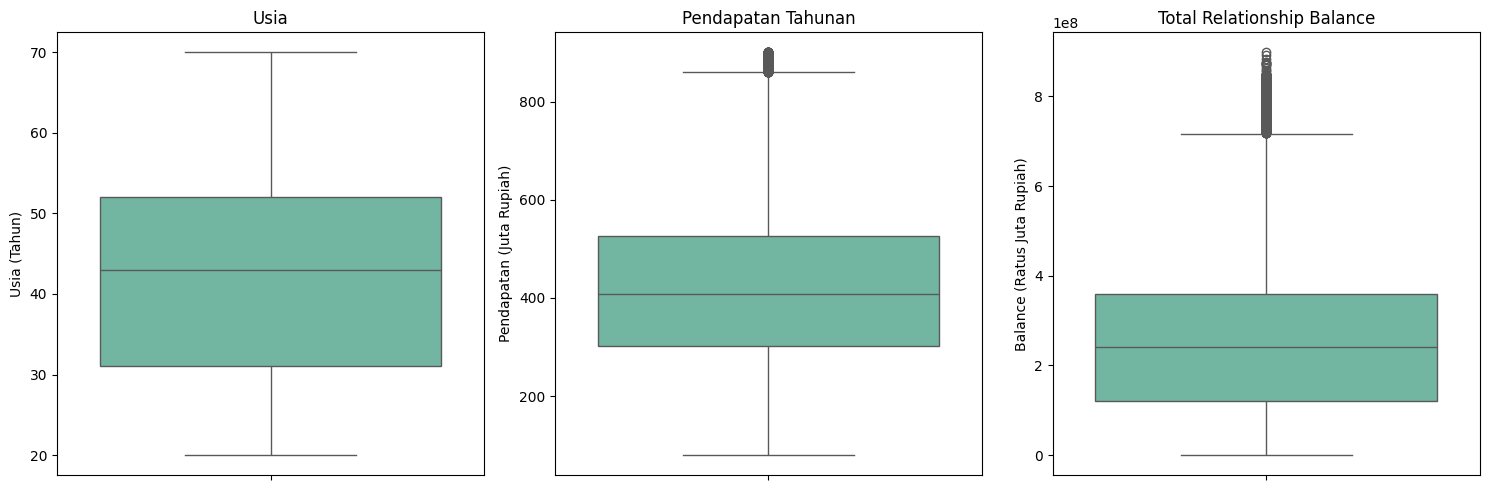

In [145]:
# Set style
plt.style.use('default')
sns.set_palette("Set2")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Boxplot untuk Usia
sns.boxplot(y=data['Usia'], ax=axes[0])
axes[0].set_title('Usia')
axes[0].set_ylabel('Usia (Tahun)')

# Boxplot untuk Pendapatan Tahunan (dalam juta rupiah untuk readability)
sns.boxplot(y=data['Pendapatan_Tahunan'], ax=axes[1])
axes[1].set_title('Pendapatan Tahunan')
axes[1].set_ylabel('Pendapatan (Juta Rupiah)')

# Boxplot untuk Total Relationship Balance (dalam juta rupiah)
sns.boxplot(y=data['Total_Relationship_Balance'], ax=axes[2])
axes[2].set_title('Total Relationship Balance')
axes[2].set_ylabel('Balance (Ratus Juta Rupiah)')

plt.tight_layout()
plt.show()

In [146]:
# Mendeteksi dan mengatasi outliers (dengan Z-Score)
from scipy import stats
z_scores = stats.zscore(data[['Usia', 'Pendapatan_Tahunan', 'Total_Relationship_Balance']])
data = data[(z_scores < 3).all(axis=1)]  # Menghapus data dengan Z-Score lebih dari 3

#### **Filtering Data Telemarketing Only**

In [48]:
data0 = data[data['Jalur_Pembukaan']=='Telemarketing']

In [49]:
data0

,GCIF,Area,Jalur_Pembukaan,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
1,G18528,Jakarta,Telemarketing,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
2,G22419,Surabaya,Telemarketing,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
7,G13193,Solo,Telemarketing,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
8,G09296,Jakarta,Telemarketing,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
9,G09228,Jakarta,Telemarketing,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28089,G19583,Bandung,Telemarketing,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal,1,1,1,1,0,1,5,489,321693904
28090,G18081,Jakarta,Telemarketing,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,0,5,658,224477967
28092,G18530,Bandung,Telemarketing,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal,1,1,1,1,0,1,5,585,411871605
28095,G03782,Jogja,Telemarketing,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal,1,1,0,1,1,1,5,279,161744694


In [50]:
data0 = data0.drop(columns=['GCIF','Jalur_Pembukaan']).reset_index(drop=True).reset_index()

In [51]:
data0

,index,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
1,1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
2,2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
3,3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
4,4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,8648,Bandung,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal,1,1,1,1,0,1,5,489,321693904
8649,8649,Jakarta,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,0,5,658,224477967
8650,8650,Bandung,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal,1,1,1,1,0,1,5,585,411871605
8651,8651,Jogja,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal,1,1,0,1,1,1,5,279,161744694


#### **Pembagian Dataset Experiment**
1. Experiment 0 --> Semua Variabel Digunakan
2. Experiment 1 --> Menggunakan Demographics
3. Experiment 2 --> Menggunakan Financial Related Variable

In [55]:
# Eksperimen 0
data0.head()

,index,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
1,1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
2,2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
3,3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
4,4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562


In [56]:
# Eksperimen 1
data1 = data0.iloc[:,1:8]
data1.head()

,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan
0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor
1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor
2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor
3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor
4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor


In [123]:
# Eksperimen 2
data2 = data0.iloc[:,8:17]
data2.head()

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,1,0,0,0,0,0,1,198,10668586
1,1,0,0,0,0,0,1,280,299076075
2,1,0,0,0,0,0,1,295,76653088
3,1,0,0,0,0,0,1,443,247157199
4,1,0,0,0,0,0,1,257,27585562


#### **Melakukan Encoding untuk Data Category**

In [58]:
data1 = pd.get_dummies(data1, columns=['Area','Jenis_Kelamin', 'Status_Perkawinan', 'Pendidikan','Vintage'])

In [59]:
data1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Jenis_Kelamin_Perempuan,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Status_Perkawinan_Menikah,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
0,23.0,0,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
1,30.0,0,False,False,False,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
2,29.0,0,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
3,49.0,0,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
4,21.0,0,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,True,False,False
8649,58.0,0,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False
8650,42.0,3,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False
8651,44.0,1,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False


#### **Standardisasi Data Numerik**

In [60]:
predname_num = data2.columns
predname_num

Index(['Produk_Tabungan', 'Produk_Deposito', 'Produk_Kartu_Kredit',
       'Produk_Kredit_Rumah', 'Produk_Kredit_Kendaraan',
       'Produk_Kredit_Dana_Tunai', 'Total_Kepemilikan_Produk',
       'Pendapatan_Tahunan', 'Total_Relationship_Balance'],
      dtype='object')

In [61]:
from sklearn.preprocessing import StandardScaler
pt = StandardScaler()
X_num = pd.DataFrame(pt.fit_transform(data2))
X_num.head()

,0,1,2,3,4,5,6,7,8
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416


In [62]:
X_num.columns = predname_num
X_num.head()

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416


#### **Pengecekan Korelasi**

In [63]:
corrtest1 = data1.corr().abs()
corrtest2 = X_num.corr().abs()

In [64]:
# Membuang Nilai Redundan Pada Matriks
upper = corrtest1.where(np.triu(np.ones(corrtest1.shape), k=1).astype(np.bool))
upper1 = corrtest2.where(np.triu(np.ones(corrtest2.shape), k=1).astype(np.bool))

# Mencari Nilai Yang Berkorelasi di atas 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop1 = [column for column in upper1.columns if any(upper1[column] > 0.7)]

# Menghapus Kolom Yang Berkorelasi di atas 0.7
data1 = data1.drop(to_drop, axis=1)
data2 = data2.drop(to_drop1, axis=1)

In [65]:
data1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
0,23.0,0,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False
1,30.0,0,False,False,False,False,False,True,True,True,False,True,False,False,False,False,False,False,False,True,False
2,29.0,0,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,False,True,False
3,49.0,0,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False
4,21.0,0,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False
8649,58.0,0,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False
8650,42.0,3,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False
8651,44.0,1,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False


In [66]:
X_num

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...
8648,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


**Gabungkan Keduanya**

In [67]:
data_combined = pd.concat([data1, X_num], axis=1, join='inner')
data_combined

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,23.0,0,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,30.0,0,False,False,False,False,False,True,True,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,29.0,0,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,49.0,0,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,21.0,0,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,58.0,0,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,42.0,3,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,44.0,1,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


### **MODELING & EVALUATION**

Pembangunan model akan menggunakan 2 algoritma:
1. K-Means
2. K-Medoid

dengan pengecekan silhouette score


### **K-Means**

In [68]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

**Experiment 0**

In [70]:
# Variasi hyperparameter (jumlah cluster)
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data_combined)
    silhouette_avg = silhouette_score(data_combined, cluster_labels)
    print(f"Silhouette Score (K-Means) -"+str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_KMeans_Exp0_'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Means) -3 : 0.43731081737346444
Silhouette Score (K-Means) -4 : 0.37992431452339676
Silhouette Score (K-Means) -5 : 0.3231396807582395


**Experiment 1**

In [71]:
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data1)
    silhouette_avg = silhouette_score(data1, cluster_labels)
    print(f"Silhouette Score (K-Means) -"+str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_KMeans_Exp1_'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Means) -3 : 0.5021981273872203
Silhouette Score (K-Means) -4 : 0.48877557780538605
Silhouette Score (K-Means) -5 : 0.4210233962025565


**Experiment 2**

In [72]:
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X_num)
    silhouette_avg = silhouette_score(X_num, cluster_labels)
    print(f"Silhouette Score (K-Means) -"+str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_KMeans_Exp2_'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Means) -3 : 0.17568395122545125
Silhouette Score (K-Means) -4 : 0.17500826370194086
Silhouette Score (K-Means) -5 : 0.18806929666647304


### **K-Medoids**

In [ ]:
pip install scikit-learn-extra

In [ ]:
from sklearn_extra.cluster import KMedoids

**Experiment 0**

In [ ]:
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(data_combined)
    silhouette_avg = silhouette_score(data_combined, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -"+str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_KMedoids_Exp0_'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Medoids) -3 : 0.4328802785465337
Silhouette Score (K-Medoids) -4 : 0.3250739649655924
Silhouette Score (K-Medoids) -5 : 0.3234972713854308


**Experiment 1**

In [ ]:
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(data1)
    silhouette_avg = silhouette_score(data1, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -"+str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_KMedoids_Exp1_'+str(n_clusters)] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Silhouette Score (K-Medoids) -3 : 0.004888651605625584


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Silhouette Score (K-Medoids) -4 : 0.46551576042678305


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Silhouette Score (K-Medoids) -5 : 0.4152210372641435


**Experiment 2**

In [ ]:
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(X_num)
    silhouette_avg = silhouette_score(X_num, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -"+str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_KMedoids_Exp2_'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Medoids) -3 : 0.11659038864364947
Silhouette Score (K-Medoids) -4 : 0.09680611087667029
Silhouette Score (K-Medoids) -5 : 0.08883545658405252


### **ANALISA HASIL**

Eksperimen 1 dengan variabel demografi menghasilkan performa terbaik menggunakan K-Means dengan 3 cluster (Silhouette Score = 0.502). Hasil ini menunjukkan bahwa faktor demografi mampu membentuk cluster yang cukup terpisah dibanding eksperimen lainnya. Namun, nilai tersebut masih di bawah target ≥ 0.7, sehingga perlu dilakukan perbaikan model atau eksplorasi metode clustering lain.

####**Analisa K-Means: Eksperimen 1**

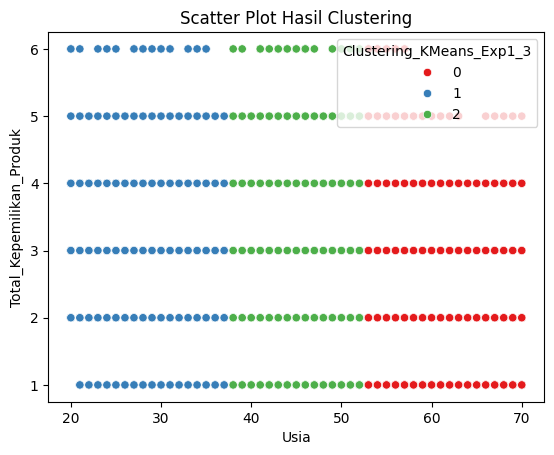

In [75]:
# Hubungan Usia dan Jumlah Produk per Nasabah
sns.scatterplot(data=data0, x='Usia', y='Total_Kepemilikan_Produk', hue='Clustering_KMeans_Exp1_3', palette='Set1')
plt.title('Scatter Plot Hasil Clustering')
plt.show()

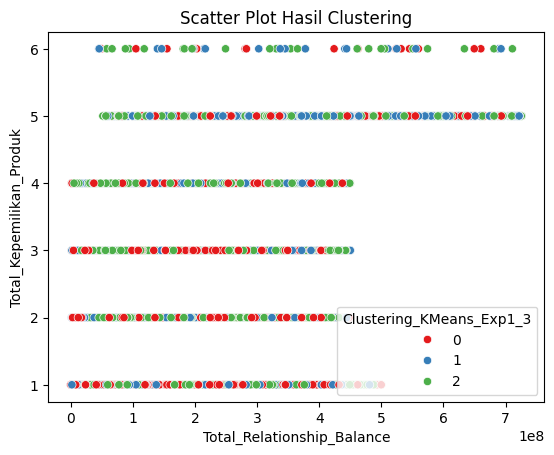

In [76]:
# Hubungan Total Relationship Balance dan Jumlah Produk per Nasabah
sns.scatterplot(data=data0, x='Total_Relationship_Balance', y='Total_Kepemilikan_Produk', hue='Clustering_KMeans_Exp1_3', palette='Set1')
plt.title('Scatter Plot Hasil Clustering')
plt.show()

In [116]:
# Rata-Rata Karakteristik per Cluster
cluster_means = data0[['Usia','Jumlah_Anak','Produk_Tabungan','Produk_Deposito','Produk_Kartu_Kredit','Produk_Kredit_Rumah','Produk_Kredit_Kendaraan','Produk_Kredit_Dana_Tunai','Total_Kepemilikan_Produk','Total_Relationship_Balance','Clustering_KMeans_Exp1_3']].groupby('Clustering_KMeans_Exp1_3').mean()
cluster_means

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Total_Relationship_Balance
Clustering_KMeans_Exp1_3,,,,,,,,,,
0,58.840056,1.474672,0.657129,0.600844,0.338649,0.618668,0.168386,0.546435,2.930113,2.389776e+08
1,29.503177,1.191528,1.000000,0.592436,0.308018,0.586989,0.157337,0.599092,3.243873,2.439352e+08
2,45.571206,1.310945,0.983520,0.602612,0.336443,0.557214,0.156716,0.521455,3.157960,2.377450e+08


#####**Cluster 0**

In [93]:
# Statistika Deskriptif
data0[data0['Clustering_KMeans_Exp1_3']==0][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,2132.000000,2132.000000,2132.000000,2.132000e+03
mean,58.840056,1.474672,2.930113,2.389776e+08
std,5.133619,1.467245,1.041285,1.379077e+08
min,53.000000,0.000000,1.000000,1.028000e+03
25%,55.000000,0.000000,2.000000,1.266333e+08
50%,57.000000,1.000000,3.000000,2.328763e+08
75%,62.000000,3.000000,4.000000,3.493216e+08
max,70.000000,4.000000,6.000000,7.181097e+08


In [98]:
# Proporsi Nasabah Berdasarkan Area
data0[data0['Clustering_KMeans_Exp1_3']==0]['Area'].value_counts(normalize=True)

,proportion
Area,
Jakarta,0.478893
Bandung,0.166041
Solo,0.128987
Surabaya,0.126173
Jogja,0.072702
Bogor,0.027205


In [107]:
# Proporsi Nasabah Berdasarkan Lama Keanggotaan
data0[data0['Clustering_KMeans_Exp1_3']==0]['Vintage'].value_counts(normalize=True)

,proportion
Vintage,
2 - 3 Tahun,0.486867
< 1 Tahun,0.313321
> 4 Tahun,0.199812


In [100]:
# Proporsi Nasabah Berdasarkan Tingkat Pendidikan
data0[data0['Clustering_KMeans_Exp1_3']==0]['Pendidikan'].value_counts(normalize=True)

,proportion
Pendidikan,
Sarjana,0.258443
SD,0.204972
SMA,0.180113
Tidak Sekolah Formal,0.101313
Magister,0.088180
SMP,0.083959
Doktor,0.083021


In [101]:
# Proporsi Nasabah Berdasarkan Gender
data0[data0['Clustering_KMeans_Exp1_3']==0]['Jenis_Kelamin'].value_counts(normalize=True)

,proportion
Jenis_Kelamin,
Laki-laki,0.668386
Perempuan,0.331614


#####**Cluster 1**

In [104]:
# Statistika Deskriptif
data0[data0['Clustering_KMeans_Exp1_3']==1][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,3305.000000,3305.000000,3305.000000,3.305000e+03
mean,29.503177,1.191528,3.243873,2.439352e+08
std,4.254972,1.480683,1.008655,1.452356e+08
min,20.000000,0.000000,1.000000,1.016565e+06
25%,26.000000,0.000000,3.000000,1.222784e+08
50%,30.000000,0.000000,3.000000,2.408255e+08
75%,33.000000,2.000000,4.000000,3.578412e+08
max,37.000000,4.000000,6.000000,7.228870e+08


In [105]:
# Proporsi Nasabah Berdasarkan Area
data0[data0['Clustering_KMeans_Exp1_3']==1]['Area'].value_counts(normalize=True)

,proportion
Area,
Jakarta,0.476248
Bandung,0.179728
Surabaya,0.126475
Solo,0.118306
Jogja,0.073222
Bogor,0.026021


In [106]:
# Proporsi Nasabah Berdasarkan Lama Keanggotaan
data0[data0['Clustering_KMeans_Exp1_3']==1]['Vintage'].value_counts(normalize=True)

,proportion
Vintage,
2 - 3 Tahun,0.501967
< 1 Tahun,0.293192
> 4 Tahun,0.204841


In [108]:
# Proporsi Nasabah Berdasarkan Tingkat Pendidikan
data0[data0['Clustering_KMeans_Exp1_3']==1]['Pendidikan'].value_counts(normalize=True)

,proportion
Pendidikan,
Sarjana,0.274130
SMA,0.192436
SD,0.180333
Doktor,0.097731
Magister,0.087443
SMP,0.084720
Tidak Sekolah Formal,0.083207


In [109]:
# Proporsi Nasabah Berdasarkan Gender
data0[data0['Clustering_KMeans_Exp1_3']==1]['Jenis_Kelamin'].value_counts(normalize=True)

,proportion
Jenis_Kelamin,
Laki-laki,0.640847
Perempuan,0.359153


####**Cluster 2**

In [110]:
# Statistika Deskriptif
data0[data0['Clustering_KMeans_Exp1_3']==2][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,3216.000000,3216.000000,3216.000000,3.216000e+03
mean,45.571206,1.310945,3.157960,2.377450e+08
std,4.278838,1.482616,1.045431,1.437032e+08
min,38.000000,0.000000,1.000000,1.384147e+06
25%,42.000000,0.000000,2.000000,1.166975e+08
50%,46.000000,1.000000,3.000000,2.309003e+08
75%,50.000000,3.000000,4.000000,3.468400e+08
max,52.000000,4.000000,6.000000,7.259942e+08


In [111]:
# Proporsi Nasabah Berdasarkan Area
data0[data0['Clustering_KMeans_Exp1_3']==1]['Area'].value_counts(normalize=True)

,proportion
Area,
Jakarta,0.476248
Bandung,0.179728
Surabaya,0.126475
Solo,0.118306
Jogja,0.073222
Bogor,0.026021


In [112]:
# Proporsi Nasabah Berdasarkan Lama Keanggotaan
data0[data0['Clustering_KMeans_Exp1_3']==1]['Vintage'].value_counts(normalize=True)

,proportion
Vintage,
2 - 3 Tahun,0.501967
< 1 Tahun,0.293192
> 4 Tahun,0.204841


In [113]:
# Proporsi Nasabah Berdasarkan Tingkat Pendidikan
data0[data0['Clustering_KMeans_Exp1_3']==1]['Pendidikan'].value_counts(normalize=True)

,proportion
Pendidikan,
Sarjana,0.274130
SMA,0.192436
SD,0.180333
Doktor,0.097731
Magister,0.087443
SMP,0.084720
Tidak Sekolah Formal,0.083207


In [114]:
# Proporsi Nasabah Berdasarkan Gender
data0[data0['Clustering_KMeans_Exp1_3']==1]['Jenis_Kelamin'].value_counts(normalize=True)

,proportion
Jenis_Kelamin,
Laki-laki,0.640847
Perempuan,0.359153
